In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc

import torch
import torch.utils as utils
from torchvision import datasets, transforms

In [2]:
dataset_name = 'train_data9'
train_set = datasets.ImageFolder(root='dataset/preproced_data/%s/'%dataset_name,
                       transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
##                             transforms.RandomVerticalFlip(p=0.5),
##                             transforms.RandomRotation(90),
                         transforms.Grayscale(),
                         transforms.Resize((64,64)),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
train_loader = utils.data.DataLoader(dataset=train_set, batch_size=1000,shuffle=True)

for idx, (data, target) in enumerate(train_loader):
    x_train = data.cpu().numpy()

score_num = 1
dir_name = ['abnormal', 'normal']
test_set = datasets.ImageFolder(root='dataset/dongdong2/%s/'%dir_name[score_num],
                           transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
                             transforms.Grayscale(),
                             transforms.Resize((64,64)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_loader = utils.data.DataLoader(dataset=test_set,batch_size=100,shuffle=False)

for idx, (data, target) in enumerate(test_loader):
    x_test = data.cpu().numpy()
    
score_num = 0    
test_set = datasets.ImageFolder(root='dataset/dongdong2/%s/'%dir_name[score_num],
                           transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
                             transforms.Grayscale(),
                             transforms.Resize((64,64)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_loader = utils.data.DataLoader(dataset=test_set,batch_size=100,shuffle=False)

for idx, (data, target) in enumerate(test_loader):
    x_out = data.cpu().numpy()

x_train = np.reshape(x_train, (len(x_train),-1))
x_test = np.reshape(x_test, (len(x_test), -1))
x_out = np.reshape(x_out, (len(x_out),-1))
print(np.shape(x_train), np.shape(x_test), np.shape(x_out))

(631, 4096) (25, 4096) (31, 4096)


0.0 0.0967741935483871
0.0 0.16129032258064516
0.0 0.41935483870967744
0.12 0.5161290322580645
0.2 0.7096774193548387
0.28 0.8064516129032258
0.28 0.8064516129032258
0.32 0.8064516129032258
0.48 0.8387096774193549
0.48 0.8709677419354839
0.68 0.9032258064516129
0.72 0.9354838709677419
0.88 0.967741935483871
0.88 1.0
0.88 1.0
0.96 1.0
0.96 1.0
0.96 1.0
0.96 1.0
1.0 1.0


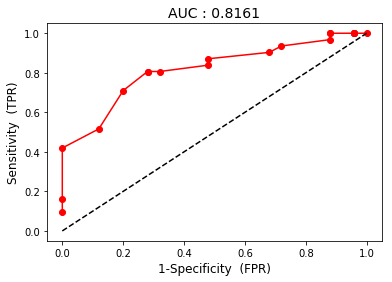

In [3]:
fpr_list = []
tpr_list = []
for k in range(1,21):
    clf = svm.OneClassSVM(nu=0.05*k, kernel='rbf', gamma='auto')
    clf.fit(x_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_pred_out = clf.predict(x_out)
    
    label = np.append(np.zeros(len(y_pred_test)),np.ones(len(y_pred_out)))
    y_hat = np.append(np.float32(y_pred_test!=1), np.float32(y_pred_out!=1))
    
    fpr, tpr, threshold = roc_curve(label, y_hat, drop_intermediate=False)
    print(fpr[1], tpr[1])
    fpr_list.append(fpr[1])
    tpr_list.append(tpr[1])

auc_result = auc(np.array(fpr_list), np.array(tpr_list))
plt.plot(fpr_list, tpr_list, 'ro-')
plt.xlabel('1-Specificity  (FPR)', fontsize=12)
plt.ylabel('Sensitivity  (TPR)', fontsize=12)
plt.plot([0,1],[0,1],'k--')
plt.title('AUC : %.4f'%auc_result, fontsize=14)
plt.savefig('ROC_plot.png')
plt.show()